# About this project - House prices prediction

This is a regression analysis project. The goal is to predict a house price based on a number of inputs such as total area, number of rooms, location and others.
This project is intended for educational purposes only.
The dataset is download from Kaggle for the city in India - Bengaluru.

The data was downloaded from kaggle: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

# Data preparation

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
raw_house_data = pd.read_csv('Bengaluru_House_Data.csv')
raw_house_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Unique values

I am interested in exploring unique values for nominal data since they might be important.

In [3]:
print(len(raw_house_data))
print(raw_house_data['area_type'].nunique())
print(raw_house_data['location'].nunique())
print(raw_house_data['size'].nunique())
print(raw_house_data['society'].nunique())

13320
4
1305
31
2688


I thought that from the "size" column I could get number for rooms, however, it is not possible since "BHK" and "Bedroom" are different ways to count rooms in a house. Meanwhile, total area in a house already implicitly includes information about number of rooms. However, I will create a column for number of rooms.

In [4]:
print(raw_house_data['area_type'].unique())
print(raw_house_data['size'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [5]:
type(raw_house_data['size'][0])

str

In [6]:
type(raw_house_data['size'][579])

float

In [7]:
# loop through each 'size' to get number of rooms
list_rooms = list(range( len(raw_house_data['size']) ))
for i in range( len(raw_house_data['size']) ):
    
    if type(raw_house_data['size'][i]) == str:
        str_split = raw_house_data['size'][i].split()
        # assign a number to the first word
        number_rooms = int(str_split[0])
        list_rooms[i] = number_rooms

        
# create new column for pd frame
raw_house_data['bedrooms'] = list_rooms
raw_house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [8]:
# create column rooms but do not count balcony
raw_house_data['rooms'] = raw_house_data['bath'] + raw_house_data['bedrooms']
raw_house_data['rooms'].isnull().sum()

73

From the cell below, there might be errors as bath and price max values are too high from the mean. Also, total_sqft column is represented as string. Changing that.

In [9]:
# total_sqft column is represented as string
print( type(raw_house_data['total_sqft'][0]) )

list_sqft = list(range( len(raw_house_data['size']) ))
for i in range( len(raw_house_data['total_sqft']) ):
    
    # some data return ValueError, for example they are written as '2080 - 4000'
    # or as strings. For them I return None.
    try:
        list_sqft[i] = int(raw_house_data['total_sqft'][i])
    except:
        list_sqft[i] = None

raw_house_data['total_sqft'] = list_sqft
raw_house_data['total_sqft'].isnull().sum()

<class 'str'>


334

In [10]:
# convert total_sqft to area_m2
raw_house_data['area_m2'] = raw_house_data['total_sqft'] * 0.0929

In [11]:
# total_price column creation
raw_house_data['total_price'] = raw_house_data['price'] * 100000

In [12]:
raw_house_data.describe()

,total_sqft,bath,balcony,price,bedrooms,rooms,area_m2,total_price
count,12986.000000,13247.000000,12711.000000,13320.000000,13320.000000,13247.000000,12986.000000,1.332000e+04
mean,1553.842292,2.692610,1.584376,112.565627,10.448724,5.494527,144.351949,1.125656e+07
std,1241.134525,1.341458,0.817263,148.971674,249.281358,2.569337,115.301397,1.489717e+07
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.000000,0.092900,8.000000e+05
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.000000,102.190000,5.000000e+06
50%,1272.000000,2.000000,2.000000,72.000000,3.000000,5.000000,118.168800,7.200000e+06
75%,1665.000000,3.000000,2.000000,120.000000,3.000000,6.000000,154.678500,1.200000e+07
max,52272.000000,40.000000,3.000000,3600.000000,11569.000000,83.000000,4856.068800,3.600000e+08


## Correlations

Bath and rooms show high correlation, along with bedrooms and bath. Total_sqft correlates somewhat with price, however, it does not correlated well with rooms, which is surprising to me. It seems like price is dependent not only on total_sqft but also location that is not directly repsented here in numbers. Since location might an important variable I sorted the table with the most expensive locations.

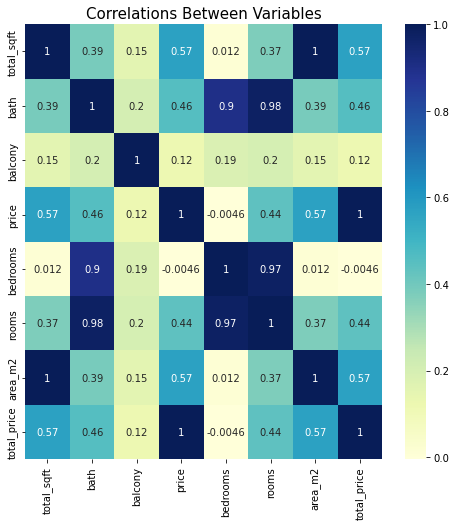

In [13]:
# visualize correlations
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(raw_house_data.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

Plot below shows price depends on area of that house in full and limited ranges. Between total price and total sqft a linear line could be drawn. However, 'location' should be important consideration. Also, those scatter plots show that little data is available for very expensive house or very big houses.

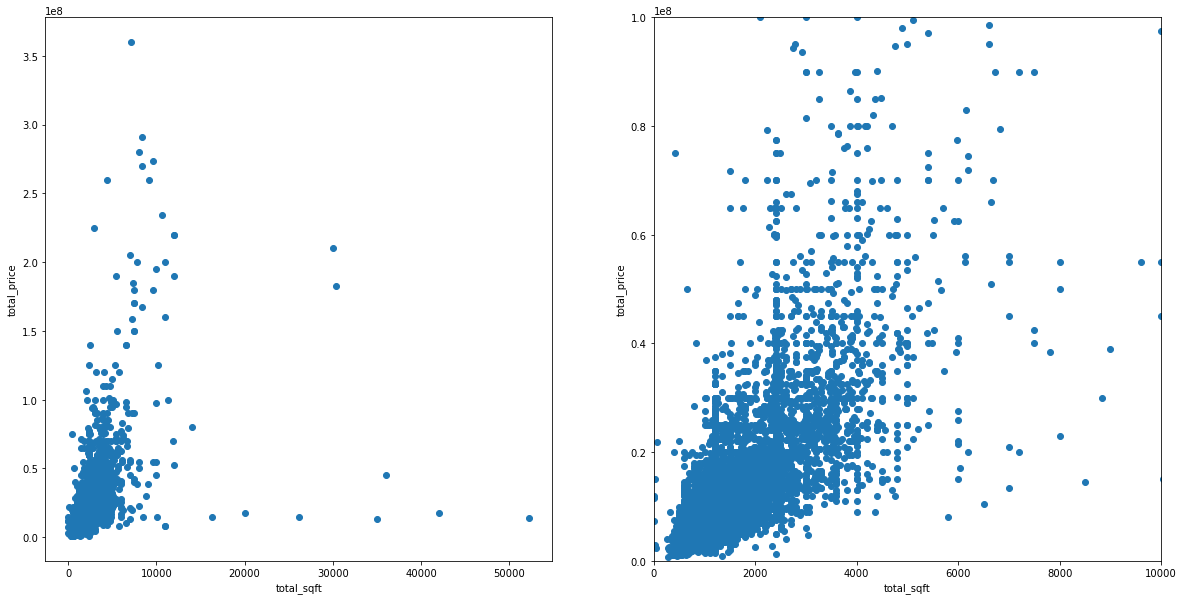

In [14]:
# quick plot of total_sqft vs total_price
plt.figure(figsize=[20,10])

# full range
plt.subplot(1,2,1)
plt.scatter(raw_house_data['total_sqft'], raw_house_data['total_price'])
plt.xlabel('total_sqft')
plt.ylabel('total_price')

# limited range
plt.subplot(1,2,2)
plt.scatter(raw_house_data['total_sqft'], raw_house_data['total_price'])
plt.xlabel('total_sqft')
plt.ylabel('total_price')
plt.xlim(0, 10000)
plt.ylim(0, 1e+08);

## Drop not relevant columns

I will drop the following columns as there are not relevant to our analysis. Columns 'bath', 'balcony', 'size' are all counted in 'rooms'.
For our classifiers inputs are location, total_sqft, rooms and total_price

In [15]:
house_data = raw_house_data.drop(['area_type','availability','society','size','bath','balcony','bedrooms','price', 'total_sqft'], axis='columns')

In [16]:
house_data.sort_values('total_price', ascending=False)

,location,rooms,area_m2,total_price
13067,Defence Colony,23.0,664.2350,360000000.0
11080,Ashok Nagar,9.0,773.0209,291200000.0
13200,Defence Colony,12.0,743.2000,280000000.0
11763,Sadashiva Nagar,12.0,891.8400,273600000.0
3180,Shanthala Nagar,10.0,773.0209,270000000.0
...,...,...,...,...
4113,BTM Layout,6.0,NaN,1000000.0
5410,Attibele,2.0,37.1600,1000000.0
8594,Chandapura,2.0,41.8050,900000.0
11569,Hosur Road,NaN,125.4150,844000.0


## Remove missing values

Only few entries will be affected.

In [17]:
# detect number of missing items
print(house_data.shape)
house_data.isnull().sum()

(13320, 4)


location         1
rooms           73
area_m2        334
total_price      0
dtype: int64

In [18]:
house_data.dropna(inplace = True)
print(house_data.shape)
house_data.isnull().sum()

(12969, 4)


location       0
rooms          0
area_m2        0
total_price    0
dtype: int64

In [19]:
house_data.head(10)

,location,rooms,area_m2,total_price
0,Electronic City Phase II,4.0,98.1024,3907000.0
1,Chikka Tirupathi,9.0,241.5400,12000000.0
2,Uttarahalli,5.0,133.7760,6200000.0
3,Lingadheeranahalli,6.0,141.3009,9500000.0
4,Kothanur,4.0,111.4800,5100000.0
5,Whitefield,4.0,108.6930,3800000.0
6,Old Airport Road,8.0,253.8028,20400000.0
7,Rajaji Nagar,8.0,306.5700,60000000.0
8,Marathahalli,6.0,121.6990,6325000.0
9,Gandhi Bazar,12.0,94.7580,37000000.0


## Explore locations

In [20]:
# number of locations
len(house_data['location'].unique())

1295

In [21]:
location_stats = house_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              517
Sarjapur  Road          385
Electronic City         302
Kanakpura Road          255
Thanisandra             221
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kanakadasa Layout         1
whitefiled                1
Name: location, Length: 1295, dtype: int64

Visualize Whitefield location

Text(0, 0.5, 'price')

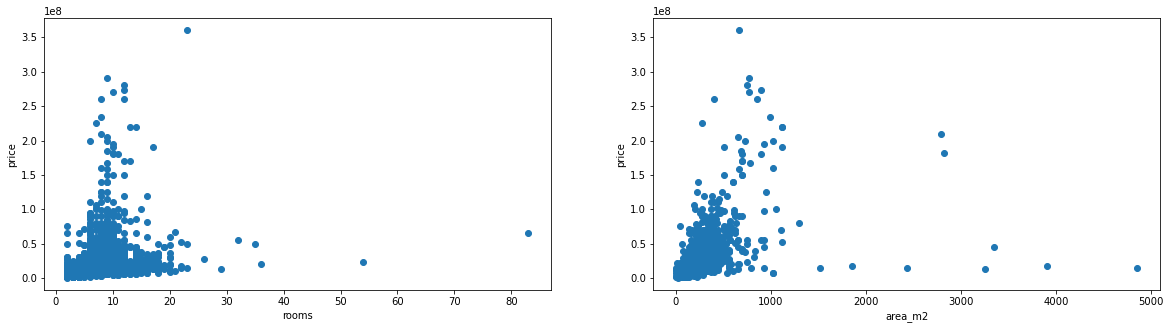

In [22]:
# visualize Whitefield location
house_data_Whitefield = house_data[ house_data['location'] == 'Whitefield' ]

plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.scatter(house_data['rooms'], house_data['total_price'])
plt.xlabel('rooms')
plt.ylabel('price')

plt.subplot(1,2,2)
plt.scatter(house_data['area_m2'], house_data['total_price'])
plt.xlabel('area_m2')
plt.ylabel('price') 

Many locations have very limited amount of data. For them, they will be combined into a single column called names. Some locations are not correctly written, for example, "Whitefield" and "whitefield". It is possible to make all locations written with smaller books. But for the sake of this exercise, I will ignore this.

In [23]:
print(len( location_stats[location_stats>=10] ))
print(len( location_stats[location_stats<=10] ))

253
1057


In [24]:
other = location_stats[location_stats<=10]
other

location
Sadashiva Nagar         10
Ganga Nagar             10
Dodsworth Layout        10
BTM 1st Stage           10
Nagappa Reddy Layout    10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
 Banaswadi               1
Kanakadasa Layout        1
whitefiled               1
Name: location, Length: 1057, dtype: int64

In [25]:
names_not_populated = other.index

In [26]:
# remove house data for the category "other" because they contain too few examples (below 10)

for i in range( len(names_not_populated) ):
    house_data['location'].replace(to_replace=names_not_populated[i], 
                                   value='other',
                                   inplace=True)   

In [27]:
# check whether renaming was done correctly
house_data['location'].nunique()

239

## Remove outliers

### Remove by area/room

(40.0, 100.0)

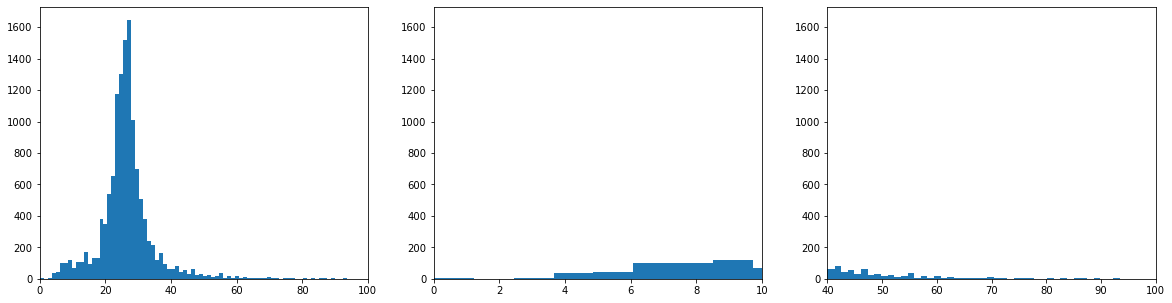

In [28]:
# create column 'area/rooms'
house_data['area/rooms'] = house_data['area_m2'] / house_data['rooms']

# visualize histogram for area/rooms
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(house_data['area/rooms'], bins=1000)
plt.xlim(0, 100)

plt.subplot(1,3,2)
plt.hist(house_data['area/rooms'], bins=1000)
plt.xlim(0, 10)

plt.subplot(1,3,3)
plt.hist(house_data['area/rooms'], bins=1000)
plt.xlim(40, 100)

In [29]:
house_data['area/rooms'].sort_values().head(20)

4086     0.011612
4972     0.033179
349      0.170317
1122     0.318514
11558    0.696750
1020     0.696750
5970     2.090250
4684     2.686265
770      3.096667
11559    3.096667
6813     3.096667
45       3.278824
1735     3.483750
5071     3.483750
992      3.657938
1567     3.716000
1887     3.981429
6052     3.981429
2752     3.981429
3039     3.981429
Name: area/rooms, dtype: float64

In [30]:
house_data['area/rooms'].sort_values(ascending=False).head(50)

7242     1214.017200
1894      971.213760
674       541.916667
10075     465.893500
5469      418.050000
2623      348.375000
7947      309.666667
12987     282.416000
7824      278.700000
5393      229.517647
11856     205.309000
12470     189.690187
1234      185.800000
6549      177.439000
12570     162.575000
440       138.072625
4258      130.060000
8165      127.737500
810       127.284612
9240      127.284612
10304     123.371200
8546      120.770000
4799      119.442857
12574     118.865550
7855      118.447500
4308      116.125000
7315      113.544444
3539      111.480000
5137      111.480000
13197     106.835000
10749     103.222222
514        98.706250
1562       94.138667
9546       92.900000
9845       92.900000
11950      89.303443
2108       89.184000
7026       88.564667
8878       87.326000
5343       87.093750
4243       87.093750
8682       86.706667
11080      85.891211
408        85.753846
9078       83.888700
9235       83.610000
8187       83.610000
13245      83

Obviously, there are rooms that take too little space, for example below 1 $m^{2}$. There are items that are very large, and there are more of them than "too small". We have long tail distribution here. I will remove houses below 2 and above 100.

In [31]:
# keep houses bigger than 2 m2/room
house_data = house_data[house_data['area/rooms'] >= 2]
# keep houses smaller than 100 m2/room
house_data = house_data[house_data['area/rooms'] <= 100]
# visualize updated table
house_data.sort_values(by='area/rooms')

,location,rooms,area_m2,total_price,area/rooms
5970,Mysore Road,2.0,4.1805,2300000.0,2.090250
4684,Munnekollal,83.0,222.9600,66000000.0,2.686265
11559,other,36.0,111.4800,20000000.0,3.096667
6813,Sector 2 HSR Layout,18.0,55.7400,9000000.0,3.096667
770,other,18.0,55.7400,19000000.0,3.096667
...,...,...,...,...,...
11950,other,7.0,625.1241,90000000.0,89.303443
9845,Akshaya Nagar,2.0,185.8000,20000000.0,92.900000
9546,other,10.0,929.0000,195000000.0,92.900000
1562,other,3.0,282.4160,18000000.0,94.138667


### Remove by price/area

(250000.0, 1000000.0)

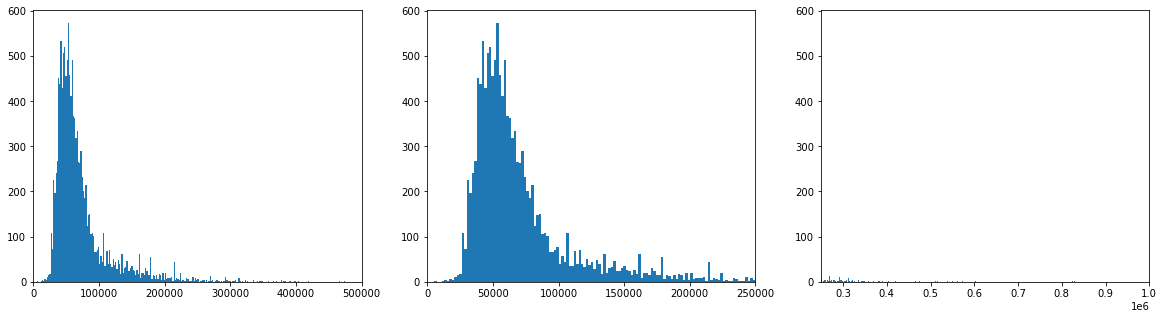

In [32]:
# create column 'price/area'
house_data['price/area'] = house_data['total_price'] / house_data['area_m2']

# visualize histogram for area/rooms
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(house_data['price/area'], bins=1000)
plt.xlim(0, 0.5E+06)

plt.subplot(1,3,2)
plt.hist(house_data['price/area'], bins=1000)
plt.xlim(0, 0.25E+06)

plt.subplot(1,3,3)
plt.hist(house_data['price/area'], bins=1000);
plt.xlim(0.25E+06, 1E+06)

In [33]:
house_data['price/area'].sort_values().head(20)

11748     5382.131324
8391     12558.306423
2421     13455.328310
3976     13993.541442
5652     14678.539975
4105     14847.258825
9374     15069.967707
7961     16560.404074
4548     16996.204181
8743     17222.820237
8653     17660.118407
996      17940.437747
8922     17940.437747
514      18362.565694
7272     19525.871780
132      20182.992465
2404     20182.992465
8541     20452.099031
7077     20855.758881
6794     21528.525296
Name: price/area, dtype: float64

In [34]:
house_data['price/area'].sort_values(ascending=False).head(50)

7657     1.899576e+06
7088     8.280202e+05
6421     8.237956e+05
12443    6.433812e+05
8398     6.027987e+05
7883     5.721206e+05
9535     5.606387e+05
5970     5.501734e+05
13067    5.419769e+05
1567     5.382131e+05
5042     5.219036e+05
9195     5.166270e+05
9737     5.125839e+05
13305    4.736276e+05
5365     4.664514e+05
10570    4.186102e+05
2286     4.036598e+05
6194     3.989037e+05
9        3.904684e+05
8576     3.834769e+05
8244     3.823003e+05
7727     3.772058e+05
13200    3.767492e+05
11080    3.767039e+05
8170     3.691164e+05
5193     3.665251e+05
2400     3.588088e+05
45       3.588088e+05
3180     3.492790e+05
1727     3.482556e+05
9974     3.475960e+05
1094     3.475960e+05
8956     3.444564e+05
770      3.408683e+05
9386     3.363832e+05
11774    3.363832e+05
12467    3.363832e+05
12209    3.363832e+05
3440     3.255321e+05
2649     3.229279e+05
2863     3.229279e+05
12796    3.229279e+05
12164    3.229279e+05
1299     3.189411e+05
4162     3.152391e+05
3527     3

I will keep only houses between 10000 and 4E+05

In [35]:
# keep houses bigger than 2 m2/room
house_data = house_data[house_data['price/area'] >= 10000]
# keep houses smaller than 100 m2/room
house_data = house_data[house_data['price/area'] <= 4E+05]
# visualize updated table
house_data.sort_values(by='price/area')

,location,rooms,area_m2,total_price,area/rooms,price/area
8391,Kengeri,2.0,111.4800,1400000.0,55.740000,12558.306423
2421,other,7.0,185.8000,2500000.0,26.542857,13455.328310
3976,other,2.0,139.3500,1950000.0,69.675000,13993.541442
5652,JP Nagar,3.0,102.1900,1500000.0,34.063333,14678.539975
4105,other,10.0,538.8200,8000000.0,53.882000,14847.258825
...,...,...,...,...,...,...
7727,other,10.0,503.7038,190000000.0,50.370380,377205.810240
8244,other,8.0,207.1670,79200000.0,25.895875,382300.269831
8576,HSR Layout,16.0,74.3200,28500000.0,4.645000,383476.856835
9,other,12.0,94.7580,37000000.0,7.896500,390468.350957


By looking back at all previous steps. I will train an algorithm to predict price only based on location and area_m2.

## Final steps before training

In [36]:
# drop unnessary columns also drop other
house_data = house_data[house_data['location'] != 'other']
del house_data['area/rooms'], house_data['price/area'], 
house_data

,location,rooms,area_m2,total_price
0,Electronic City Phase II,4.0,98.1024,3907000.0
1,Chikka Tirupathi,9.0,241.5400,12000000.0
2,Uttarahalli,5.0,133.7760,6200000.0
3,Lingadheeranahalli,6.0,141.3009,9500000.0
4,Kothanur,4.0,111.4800,5100000.0
...,...,...,...,...
13314,Green Glen Layout,6.0,159.3235,11200000.0
13315,Whitefield,9.0,320.7837,23100000.0
13317,Raja Rajeshwari Nagar,4.0,105.9989,6000000.0
13318,Padmanabhanagar,8.0,435.6081,48800000.0


In [37]:
house_data[['location', 'area_m2']]

,location,area_m2
0,Electronic City Phase II,98.1024
1,Chikka Tirupathi,241.5400
2,Uttarahalli,133.7760
3,Lingadheeranahalli,141.3009
4,Kothanur,111.4800
...,...,...
13314,Green Glen Layout,159.3235
13315,Whitefield,320.7837
13317,Raja Rajeshwari Nagar,105.9989
13318,Padmanabhanagar,435.6081


# Prepare X and y

For this regression task, I will prepare the following.
Inputs:
    X - location, area_m2
Output:
    y - price of a house
    
My goal is to create a model where a user writes down his location, area, and rooms, then gets estimate price with confidence intervals. If the location does not have many entries, then a user will see similar sales. 

In [38]:
X = pd.get_dummies( house_data[['location', 'area_m2', 'rooms']] )
X

,area_m2,rooms,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,98.1024,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,241.5400,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,133.7760,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141.3009,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111.4800,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,159.3235,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,320.7837,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,105.9989,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,435.6081,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = house_data['total_price']
y

0         3907000.0
1        12000000.0
2         6200000.0
3         9500000.0
4         5100000.0
            ...    
13314    11200000.0
13315    23100000.0
13317     6000000.0
13318    48800000.0
13319     1700000.0
Name: total_price, Length: 10060, dtype: float64

# Classification

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=10)

In [54]:
# calculate 95% confidence interval by using t distribution
import scipy.stats as st
st.t.interval(alpha=0.95,
              df=len(cv_scores)-1,
              loc=np.mean(cv_scores),
              scale=st.sem(cv_scores))

(0.6681393809871992, 0.7190759817591577)

In [55]:
cv_scores.mean()

0.6936076813731784